In [634]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [635]:
df = pd.read_csv('parsed.csv')
df.head(10)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33.0,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14.0,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
5,Максим Юсов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304233768/,Серпухов,sale,flat,2,3,1,46.7,...,-1,25 м²,6 м²,79647820594,-1,Серпухов,2-я Московская,6к3,NaN,NaN
6,ID 9655060,unknown,https://serpukhov.cian.ru/sale/flat/304697154/,Серпухов,sale,flat,3,5,1,29.0,...,-1,25 м²,-1,79645658245,3 м,Серпухов,Форсса,10,NaN,NaN
7,Этажи Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/304332318/,Серпухов,sale,flat,3,6,1,19.1,...,-1,-1,-1,79647821411,-1,Серпухов,Крюкова,4,NaN,NaN
8,Ольга Протченко,realtor,https://serpukhov.cian.ru/sale/flat/295915722/,Серпухов,sale,flat,1,2,1,27.1,...,-1,18 м²,6 м²,79671343432,"2,5 м",NaN,NaN,NaN,NaN,NaN
9,Глеб Маслов,realtor,https://serpukhov.cian.ru/sale/flat/304548494/,Серпухов,sale,flat,6,9,2,42.7,...,-1,"29,7 м²","5,6 м²",79150509841,"2,7 м",Серпухов,Весенняя,56,NaN,NaN


In [636]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8393 entries, 0 to 8392
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   author                7592 non-null   object
 1   author_type           7595 non-null   object
 2   url                   7906 non-null   object
 3   location              7906 non-null   object
 4   deal_type             7906 non-null   object
 5   accommodation_type    7906 non-null   object
 6   floor                 7906 non-null   object
 7   floors_count          7906 non-null   object
 8   rooms_count           7906 non-null   object
 9   total_meters          7906 non-null   object
 10  price                 7893 non-null   object
 11  year_of_construction  7906 non-null   object
 12  object_type           7906 non-null   object
 13  have_loggia           7906 non-null   object
 14  parking_type          7906 non-null   object
 15  house_material_type   7906 non-null   

In [637]:
df.drop(columns=['author', 'author_type', 'deal_type', 'url', 'accommodation_type', 'phone', 'house_number', 'heating_type', 'have_loggia', 'house_material_type', 'finish_type'], inplace=True)
df = df.drop_duplicates()
df_clean = df.dropna(thresh=3)  

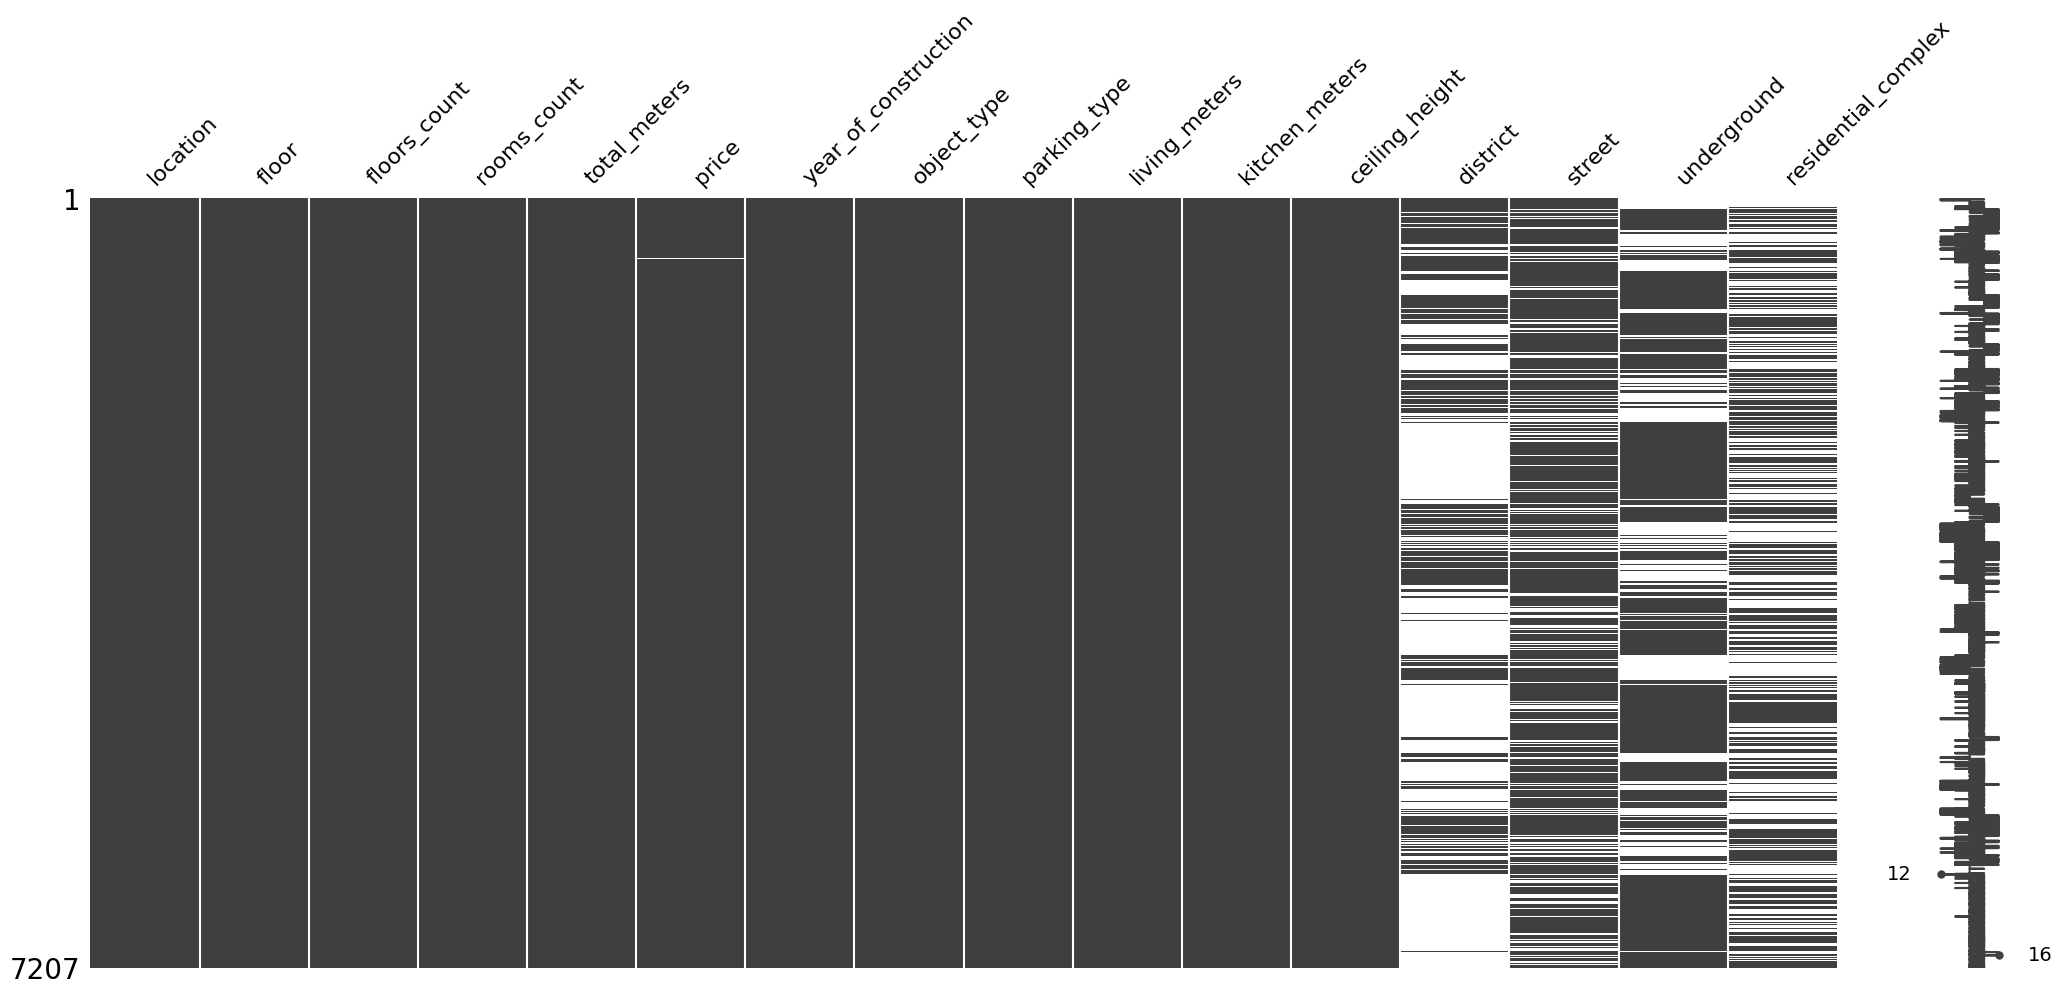

<Figure size 1000x500 with 0 Axes>

In [638]:
msno.matrix(df_clean)
plt.figure(figsize=(10,5))
plt.show()

In [639]:
for column in df_clean.columns:
    df_clean[column].fillna(df_clean[column].mode()[0], inplace=True)

C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16988\1697200407.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[column].fillna(df_clean[column].mode()[0], inplace=True)
C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16988\1697200407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[column].fillna(df_clean[column].mode

In [640]:
df_clean.head(30)

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,Серпухов,6,6,1,20.7,2350000,1917,Вторичка,Наземная,18 м²,1 м²,3 м,Серпухов,Крюкова,Щёлковская,Новоград Павлино
1,Серпухов,1,9,1,33.0,4150000,1975,Вторичка,-1,18 м²,6 м²,"2,7 м",Дмитров,Ворошилова,Аннино,Новоград Павлино
2,Серпухов,4,4,1,14.0,1700000,-1,Вторичка,-1,-1,-1,-1,Красный Текстильщик мкр,Красный Текстильщик,Щёлковская,Новоград Павлино
3,Серпухов,5,5,1,17.5,2500000,1968,Вторичка,-1,-1,-1,-1,Серпухов,Российская,Щёлковская,Новоград Павлино
4,Серпухов,4,7,1,25.9,3000000,2009,Вторичка,Наземная,20 м²,5 м²,"3,5 м",Серпухов,Химиков,Щёлковская,Новоград Павлино
5,Серпухов,2,3,1,46.7,6599999,-1,Вторичка,-1,25 м²,6 м²,-1,Серпухов,2-я Московская,Щёлковская,Новоград Павлино
6,Серпухов,3,5,1,29.0,3350000,1917,Вторичка,Наземная,25 м²,-1,3 м,Серпухов,Форсса,Щёлковская,Новоград Павлино
7,Серпухов,3,6,1,19.1,3600000,1917,Вторичка,-1,-1,-1,-1,Серпухов,Крюкова,Щёлковская,Новоград Павлино
8,Серпухов,1,2,1,27.1,1900000,1969,Вторичка,Наземная,18 м²,6 м²,"2,5 м",Дмитров,Советская,Щёлковская,Новоград Павлино
9,Серпухов,6,9,2,42.7,3990000,1980,Вторичка,Наземная,"29,7 м²","5,6 м²","2,7 м",Серпухов,Весенняя,Щёлковская,Новоград Павлино


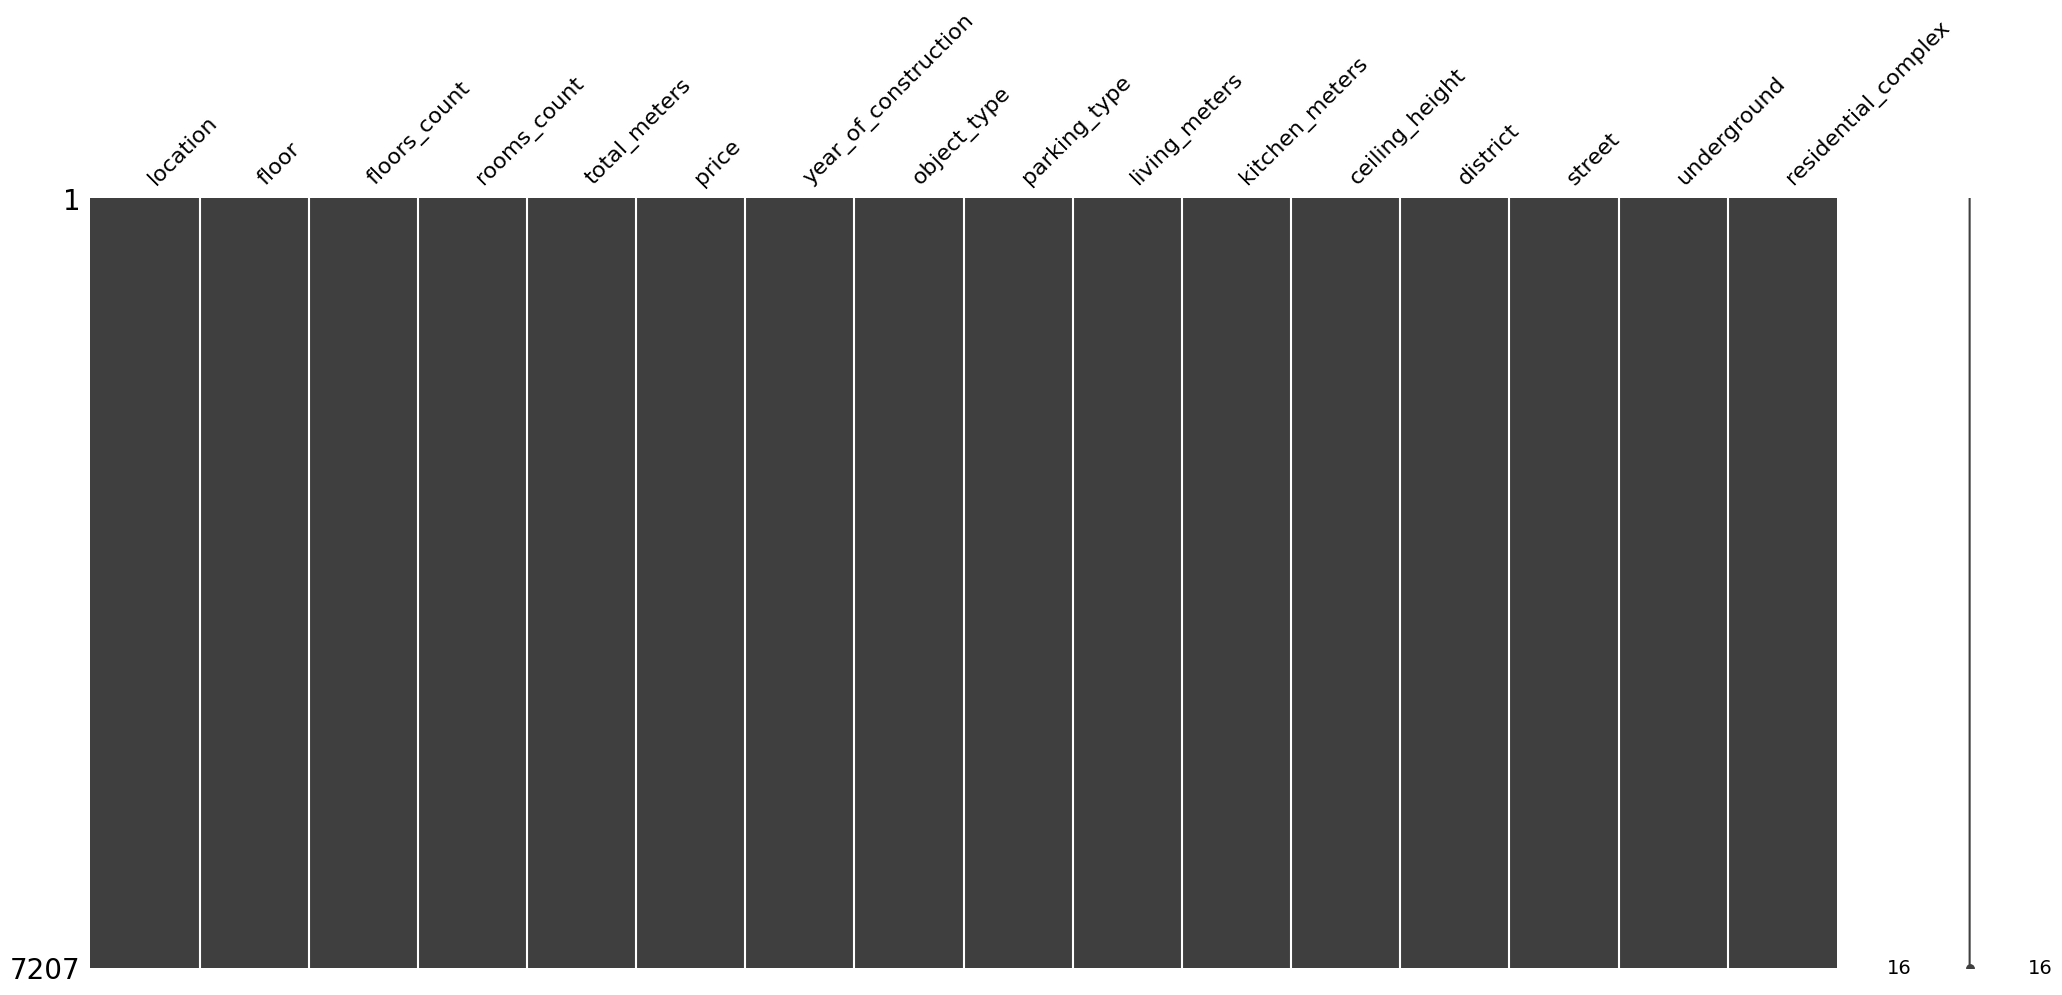

<Figure size 1000x500 with 0 Axes>

In [641]:
msno.matrix(df_clean)
plt.figure(figsize=(10,5))
plt.show()

In [642]:
df_clean['floor'].unique()

array(['6', '1', '4', '5', '2', '3', '15', '8', '7', '9', '18', '13',
       '10', '11', '35', '22', '12', '20', '14', '19', '37', '24', '28',
       '17', '34', '16', '40', '21', '41', '30', '33', '29', '23', '25',
       '26', '75', '62', '31', '46', '48', '80', '53', '38', '27', '57',
       '59', '32', '36', '47', '82', '39', '79', 'floor', '66', '60',
       '51'], dtype=object)

In [643]:
df_clean['floor'] = df_clean['floor'].replace('floor', '3')

C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16988\1059912286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floor'] = df_clean['floor'].replace('floor', '3')


In [644]:

df_clean['floor'] = df_clean['floor'].astype('int64')

C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16988\3602364599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floor'] = df_clean['floor'].astype('int64')


In [645]:
df_clean['floor'].unique()

array([ 6,  1,  4,  5,  2,  3, 15,  8,  7,  9, 18, 13, 10, 11, 35, 22, 12,
       20, 14, 19, 37, 24, 28, 17, 34, 16, 40, 21, 41, 30, 33, 29, 23, 25,
       26, 75, 62, 31, 46, 48, 80, 53, 38, 27, 57, 59, 32, 36, 47, 82, 39,
       79, 66, 60, 51])

In [646]:
df_clean['floors_count'].unique()

array(['6', '9', '4', '5', '7', '3', '2', '17', '10', '24', '1', '14',
       '18', '12', '23', '20', '41', '21', '43', '8', '59', '40', '27',
       '15', '13', '16', '22', '29', '25', '30', '49', '31', '39', '53',
       '28', '85', '35', '26', '32', '34', '57', '19', '11', '36', '68',
       '38', '51', '78', '79', '47', '33', '64', '75', '45', '37', '63',
       '95', '52', '54', '77', '46', '44', '67', '50', '48', '76', '42',
       '55', '56', '97', '65', 'floors_count', '66'], dtype=object)

In [647]:
df_clean['floors_count'].unique()

df_clean['floors_count'] = (df_clean['floors_count'].replace({'floors_count': '3', -1: np.nan}))

df_clean['floors_count'] = df_clean['floors_count'].astype(float)

mean_value = df_clean['floors_count'].mean()

df_clean['floors_count'] = df_clean['floors_count'].fillna(mean_value)

df_clean['floors_count'] = df_clean['floors_count'].astype('int64')

df_clean['floors_count'].unique()


C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16988\2363612590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floors_count'] = (df_clean['floors_count'].replace({'floors_count': '3', -1: np.nan}))
C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16988\2363612590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['floors_count'] = df_clean['floors_count'].astype(float)
C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16988\2363612590.py:9: SettingWithCopyWarning: 
A value is trying t

array([ 6,  9,  4,  5,  7,  3,  2, 17, 10, 24,  1, 14, 18, 12, 23, 20, 41,
       21, 43,  8, 59, 40, 27, 15, 13, 16, 22, 29, 25, 30, 49, 31, 39, 53,
       28, 85, 35, 26, 32, 34, 57, 19, 11, 36, 68, 38, 51, 78, 79, 47, 33,
       64, 75, 45, 37, 63, 95, 52, 54, 77, 46, 44, 67, 50, 48, 76, 42, 55,
       56, 97, 65, 66])

In [648]:
df_clean.head(30)

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,Серпухов,6,6,1,20.7,2350000,1917,Вторичка,Наземная,18 м²,1 м²,3 м,Серпухов,Крюкова,Щёлковская,Новоград Павлино
1,Серпухов,1,9,1,33.0,4150000,1975,Вторичка,-1,18 м²,6 м²,"2,7 м",Дмитров,Ворошилова,Аннино,Новоград Павлино
2,Серпухов,4,4,1,14.0,1700000,-1,Вторичка,-1,-1,-1,-1,Красный Текстильщик мкр,Красный Текстильщик,Щёлковская,Новоград Павлино
3,Серпухов,5,5,1,17.5,2500000,1968,Вторичка,-1,-1,-1,-1,Серпухов,Российская,Щёлковская,Новоград Павлино
4,Серпухов,4,7,1,25.9,3000000,2009,Вторичка,Наземная,20 м²,5 м²,"3,5 м",Серпухов,Химиков,Щёлковская,Новоград Павлино
5,Серпухов,2,3,1,46.7,6599999,-1,Вторичка,-1,25 м²,6 м²,-1,Серпухов,2-я Московская,Щёлковская,Новоград Павлино
6,Серпухов,3,5,1,29.0,3350000,1917,Вторичка,Наземная,25 м²,-1,3 м,Серпухов,Форсса,Щёлковская,Новоград Павлино
7,Серпухов,3,6,1,19.1,3600000,1917,Вторичка,-1,-1,-1,-1,Серпухов,Крюкова,Щёлковская,Новоград Павлино
8,Серпухов,1,2,1,27.1,1900000,1969,Вторичка,Наземная,18 м²,6 м²,"2,5 м",Дмитров,Советская,Щёлковская,Новоград Павлино
9,Серпухов,6,9,2,42.7,3990000,1980,Вторичка,Наземная,"29,7 м²","5,6 м²","2,7 м",Серпухов,Весенняя,Щёлковская,Новоград Павлино


In [649]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7207 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7207 non-null   object
 1   floor                 7207 non-null   int64 
 2   floors_count          7207 non-null   int64 
 3   rooms_count           7207 non-null   object
 4   total_meters          7207 non-null   object
 5   price                 7207 non-null   object
 6   year_of_construction  7207 non-null   object
 7   object_type           7207 non-null   object
 8   parking_type          7207 non-null   object
 9   living_meters         7207 non-null   object
 10  kitchen_meters        7207 non-null   object
 11  ceiling_height        7207 non-null   object
 12  district              7207 non-null   object
 13  street                7207 non-null   object
 14  underground           7207 non-null   object
 15  residential_complex   7207 non-null   objec

In [650]:
df_clean['rooms_count'].unique()

df_clean['rooms_count'] = (df_clean['rooms_count'].replace({'rooms_count': '3', -1: np.nan}))

df_clean['rooms_count'] = df_clean['rooms_count'].astype(float)

mean_value = df_clean['rooms_count'].mean()

df_clean['rooms_count'] = df_clean['rooms_count'].fillna(mean_value)

df_clean['rooms_count'] = df_clean['rooms_count'].astype(int)

df_clean['rooms_count'].unique()



C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16988\3361046204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rooms_count'] = (df_clean['rooms_count'].replace({'rooms_count': '3', -1: np.nan}))
C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16988\3361046204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rooms_count'] = df_clean['rooms_count'].astype(float)
C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16988\3361046204.py:9: SettingWithCopyWarning: 
A value is trying to be 

array([ 1,  2, -1,  3,  4,  5])

In [651]:
df_clean.head(30)

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,parking_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,Серпухов,6,6,1,20.7,2350000,1917,Вторичка,Наземная,18 м²,1 м²,3 м,Серпухов,Крюкова,Щёлковская,Новоград Павлино
1,Серпухов,1,9,1,33.0,4150000,1975,Вторичка,-1,18 м²,6 м²,"2,7 м",Дмитров,Ворошилова,Аннино,Новоград Павлино
2,Серпухов,4,4,1,14.0,1700000,-1,Вторичка,-1,-1,-1,-1,Красный Текстильщик мкр,Красный Текстильщик,Щёлковская,Новоград Павлино
3,Серпухов,5,5,1,17.5,2500000,1968,Вторичка,-1,-1,-1,-1,Серпухов,Российская,Щёлковская,Новоград Павлино
4,Серпухов,4,7,1,25.9,3000000,2009,Вторичка,Наземная,20 м²,5 м²,"3,5 м",Серпухов,Химиков,Щёлковская,Новоград Павлино
5,Серпухов,2,3,1,46.7,6599999,-1,Вторичка,-1,25 м²,6 м²,-1,Серпухов,2-я Московская,Щёлковская,Новоград Павлино
6,Серпухов,3,5,1,29.0,3350000,1917,Вторичка,Наземная,25 м²,-1,3 м,Серпухов,Форсса,Щёлковская,Новоград Павлино
7,Серпухов,3,6,1,19.1,3600000,1917,Вторичка,-1,-1,-1,-1,Серпухов,Крюкова,Щёлковская,Новоград Павлино
8,Серпухов,1,2,1,27.1,1900000,1969,Вторичка,Наземная,18 м²,6 м²,"2,5 м",Дмитров,Советская,Щёлковская,Новоград Павлино
9,Серпухов,6,9,2,42.7,3990000,1980,Вторичка,Наземная,"29,7 м²","5,6 м²","2,7 м",Серпухов,Весенняя,Щёлковская,Новоград Павлино


In [652]:
df_clean['rooms_count'].unique()

array([ 1,  2, -1,  3,  4,  5])

In [653]:
df_clean['rooms_count'] = (df_clean['rooms_count'].replace(-1, np.nan))

df_clean['rooms_count'] = df_clean['rooms_count'].astype(float)

mean_value = df_clean['rooms_count'].mean()

df_clean['rooms_count'] = df_clean['rooms_count'].fillna(mean_value)

df_clean['rooms_count'] = df_clean['rooms_count'].astype('int64')

df_clean['rooms_count'].unique()

C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16988\2995839078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rooms_count'] = (df_clean['rooms_count'].replace(-1, np.nan))
C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16988\2995839078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rooms_count'] = df_clean['rooms_count'].astype(float)
C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16988\2995839078.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

array([1, 2, 3, 4, 5])

In [654]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7207 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7207 non-null   object
 1   floor                 7207 non-null   int64 
 2   floors_count          7207 non-null   int64 
 3   rooms_count           7207 non-null   int64 
 4   total_meters          7207 non-null   object
 5   price                 7207 non-null   object
 6   year_of_construction  7207 non-null   object
 7   object_type           7207 non-null   object
 8   parking_type          7207 non-null   object
 9   living_meters         7207 non-null   object
 10  kitchen_meters        7207 non-null   object
 11  ceiling_height        7207 non-null   object
 12  district              7207 non-null   object
 13  street                7207 non-null   object
 14  underground           7207 non-null   object
 15  residential_complex   7207 non-null   objec

In [655]:
if (df_clean['total_meters'] == -1).any():
    print('У вас есть -1')
else:
    print('У вас нет -1')


У вас нет -1


In [656]:
if (df_clean['total_meters'] == str).any():
    print('У вас есть str')
else:
    print('У вас нет str')


У вас нет str


In [657]:
df_clean['total_meters'] = pd.to_numeric(df_clean['total_meters'], errors='coerce').astype('float64')


C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16988\54468129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['total_meters'] = pd.to_numeric(df_clean['total_meters'], errors='coerce').astype('float64')


In [658]:
df_clean['total_meters'].unique()

array([20.7 , 33.  , 14.  , ..., 30.47, 36.79, 48.39])

In [659]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7207 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7207 non-null   object 
 1   floor                 7207 non-null   int64  
 2   floors_count          7207 non-null   int64  
 3   rooms_count           7207 non-null   int64  
 4   total_meters          7206 non-null   float64
 5   price                 7207 non-null   object 
 6   year_of_construction  7207 non-null   object 
 7   object_type           7207 non-null   object 
 8   parking_type          7207 non-null   object 
 9   living_meters         7207 non-null   object 
 10  kitchen_meters        7207 non-null   object 
 11  ceiling_height        7207 non-null   object 
 12  district              7207 non-null   object 
 13  street                7207 non-null   object 
 14  underground           7207 non-null   object 
 15  residential_complex   7207

In [660]:
df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')

df_clean['price'] = df_clean['price'].astype(float)

mean_value = df_clean['price'].mean()

df_clean['price'] = df_clean['price'].fillna(mean_value)

df_clean['price'] = df_clean['price'].astype('int64')

df_clean['price'].unique()


C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16988\4098315704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')
C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16988\4098315704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = df_clean['price'].astype(float)
C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16988\4098315704.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

array([ 2350000,  4150000,  1700000, ...,  9865233,  8607014, 13014356])

In [661]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7207 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7207 non-null   object 
 1   floor                 7207 non-null   int64  
 2   floors_count          7207 non-null   int64  
 3   rooms_count           7207 non-null   int64  
 4   total_meters          7206 non-null   float64
 5   price                 7207 non-null   int64  
 6   year_of_construction  7207 non-null   object 
 7   object_type           7207 non-null   object 
 8   parking_type          7207 non-null   object 
 9   living_meters         7207 non-null   object 
 10  kitchen_meters        7207 non-null   object 
 11  ceiling_height        7207 non-null   object 
 12  district              7207 non-null   object 
 13  street                7207 non-null   object 
 14  underground           7207 non-null   object 
 15  residential_complex   7207

In [662]:
duplicates = df_clean.duplicated().sum()
print("Количество дубликатов в DataFrame:", duplicates)
df_clean = df_clean.drop_duplicates()


Количество дубликатов в DataFrame: 1


In [663]:
label_encoder = LabelEncoder()

df_clean['location'] = label_encoder.fit_transform(df_clean['location'])
df_clean['location'] = label_encoder.fit_transform(df_clean['location']).astype("int64")
df_clean['residential_complex'] = label_encoder.fit_transform(df_clean['residential_complex'])
df_clean['residential_complex'] = label_encoder.fit_transform(df_clean['residential_complex']).astype("int64")
df_clean['underground'] = label_encoder.fit_transform(df_clean['underground'])
df_clean['underground'] = label_encoder.fit_transform(df_clean['underground']).astype("int64")
df_clean['street'] = label_encoder.fit_transform(df_clean['street'])
df_clean['street'] = label_encoder.fit_transform(df_clean['street']).astype("int64")
df_clean['district'] = label_encoder.fit_transform(df_clean['district'])
df_clean['district'] = label_encoder.fit_transform(df_clean['district']).astype("int64")

In [664]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7206 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7206 non-null   int64  
 1   floor                 7206 non-null   int64  
 2   floors_count          7206 non-null   int64  
 3   rooms_count           7206 non-null   int64  
 4   total_meters          7205 non-null   float64
 5   price                 7206 non-null   int64  
 6   year_of_construction  7206 non-null   object 
 7   object_type           7206 non-null   object 
 8   parking_type          7206 non-null   object 
 9   living_meters         7206 non-null   object 
 10  kitchen_meters        7206 non-null   object 
 11  ceiling_height        7206 non-null   object 
 12  district              7206 non-null   int64  
 13  street                7206 non-null   int64  
 14  underground           7206 non-null   int64  
 15  residential_complex   7206

In [665]:
df_clean['year_of_construction'].unique()

array(['1917', '1975', '-1', '1968', '2009', '1969', '1980', '1990',
       '1964', '2025', '2015', '1970', '1984', '1965', '2010', 'Аукцион',
       '1992', '2011', '1986', '1994', '1956', '1966', '1973', '1971',
       '1957', '2013', '1981', '1972', '1959', '2004', '1962', '2019',
       '1978', '1977', '2003', '1963', '1952', '2024', '2007', '1995',
       '1976', '1982', '1953', '2008', '2026', '2023', '1941', '2028',
       '1993', '2016', '2027', '2017', '2022', '1932', '2012', '1960',
       '2006', '1926', '2020', '1943', '2014', '2021', '1967', '1904',
       '1991', '2018', '1987', '1988', '1974', 'Напишите автору', '1979',
       '1929', '1989', '1985', '1930', '2005', '1958', '1996', '1940',
       '1948', '1961', '1938', '1997', '2002', '2001', '1999', '1983',
       '1998', '1902', '2000', '1915', '1910', '1939', '1954', '1897',
       '1955', '1900', 'Позвоните автору', '1949', '1947', '1901', '1909',
       '1600', '1951', '1936', 'year_of_construction', '1931', '1950'

In [666]:

df_clean = df_clean[df_clean['year_of_construction'] != -1]
df_clean['year_of_construction'] = df_clean['year_of_construction'].replace({
    '-1': np.nan,
    'year_of_construction': np.nan, 
    'Аукцион': np.nan, 
    'Напишите автору': np.nan, 
    'Позвоните автору': np.nan
})
df_clean['year_of_construction'] = df_clean['year_of_construction'].astype(float)

mean_value = df_clean['year_of_construction'].mean()

df_clean['year_of_construction'] = df_clean['year_of_construction'].fillna(mean_value)

df_clean['year_of_construction'] = df_clean['year_of_construction'].astype('int64')

df_clean['year_of_construction'].unique()

array([1917, 1975, 2006, 1968, 2009, 1969, 1980, 1990, 1964, 2025, 2015,
       1970, 1984, 1965, 2010, 1992, 2011, 1986, 1994, 1956, 1966, 1973,
       1971, 1957, 2013, 1981, 1972, 1959, 2004, 1962, 2019, 1978, 1977,
       2003, 1963, 1952, 2024, 2007, 1995, 1976, 1982, 1953, 2008, 2026,
       2023, 1941, 2028, 1993, 2016, 2027, 2017, 2022, 1932, 2012, 1960,
       1926, 2020, 1943, 2014, 2021, 1967, 1904, 1991, 2018, 1987, 1988,
       1974, 1979, 1929, 1989, 1985, 1930, 2005, 1958, 1996, 1940, 1948,
       1961, 1938, 1997, 2002, 2001, 1999, 1983, 1998, 1902, 2000, 1915,
       1910, 1939, 1954, 1897, 1955, 1900, 1949, 1947, 1901, 1909, 1600,
       1951, 1936, 1931, 1950, 1934, 1928, 1945, 1937, 1927, 1896, 1777,
       2031, 1935])

In [667]:
df_clean['object_type'].unique()

array(['Вторичка', 'Новостройка', 'Вторичка / Апартаменты',
       'Новостройка / Апартаменты', 'Вторичка / Пентхаус',
       'Новостройка / Пентхаус', 'object_type'], dtype=object)

In [668]:
df_clean['object_type'] = label_encoder.fit_transform(df_clean['object_type'])
df_clean['object_type'] = label_encoder.fit_transform(df_clean['object_type']).astype("int64")

In [669]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7206 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7206 non-null   int64  
 1   floor                 7206 non-null   int64  
 2   floors_count          7206 non-null   int64  
 3   rooms_count           7206 non-null   int64  
 4   total_meters          7205 non-null   float64
 5   price                 7206 non-null   int64  
 6   year_of_construction  7206 non-null   int64  
 7   object_type           7206 non-null   int64  
 8   parking_type          7206 non-null   object 
 9   living_meters         7206 non-null   object 
 10  kitchen_meters        7206 non-null   object 
 11  ceiling_height        7206 non-null   object 
 12  district              7206 non-null   int64  
 13  street                7206 non-null   int64  
 14  underground           7206 non-null   int64  
 15  residential_complex   7206

In [670]:
df_clean['parking_type'].unique()

array(['Наземная', '-1', 'Многоуровневая', 'Подземная', 'Открытая',
       'parking_type'], dtype=object)

In [671]:
df_clean = df_clean[df_clean['parking_type'] != '-1']

df_clean['parking_type'] = df_clean['parking_type'].replace({'-1': np.nan, 'parking_type': np.nan})

label_encoder = LabelEncoder()
df_clean['parking_type'] = label_encoder.fit_transform(df_clean['parking_type'].astype(str))


In [672]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4038 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              4038 non-null   int64  
 1   floor                 4038 non-null   int64  
 2   floors_count          4038 non-null   int64  
 3   rooms_count           4038 non-null   int64  
 4   total_meters          4037 non-null   float64
 5   price                 4038 non-null   int64  
 6   year_of_construction  4038 non-null   int64  
 7   object_type           4038 non-null   int64  
 8   parking_type          4038 non-null   int64  
 9   living_meters         4038 non-null   object 
 10  kitchen_meters        4038 non-null   object 
 11  ceiling_height        4038 non-null   object 
 12  district              4038 non-null   int64  
 13  street                4038 non-null   int64  
 14  underground           4038 non-null   int64  
 15  residential_complex   4038

In [673]:
df_clean['living_meters'].unique()

array(['18\xa0м²', '20\xa0м²', '25\xa0м²', '29,7\xa0м²', '24,9\xa0м²',
       '-1', '13,4\xa0м²', '28\xa0м²', '15\xa0м²', '50\xa0м²', '40\xa0м²',
       '41\xa0м²', '32,5\xa0м²', '27,4\xa0м²', '17\xa0м²', '39\xa0м²',
       '27\xa0м²', '30\xa0м²', '26\xa0м²', '18,1\xa0м²', '13\xa0м²',
       '18,2\xa0м²', '16\xa0м²', '9\xa0м²', '14\xa0м²', '11,4\xa0м²',
       '19,3\xa0м²', '20,7\xa0м²', '33\xa0м²', '32\xa0м²', '31,2\xa0м²',
       '56,5\xa0м²', '48,8\xa0м²', '37\xa0м²', '50,5\xa0м²', '37,7\xa0м²',
       '52\xa0м²', '52,1\xa0м²', '35,7\xa0м²', '26,8\xa0м²', '45,8\xa0м²',
       '6,3\xa0м²', '10,5\xa0м²', '28,2\xa0м²', '13,5\xa0м²',
       '10,3\xa0м²', '12,8\xa0м²', '70,9\xa0м²', '46,6\xa0м²', '60\xa0м²',
       '52,2\xa0м²', '112\xa0м²', '51,2\xa0м²', '101,4\xa0м²', '55\xa0м²',
       '93\xa0м²', '34,3\xa0м²', '54,1\xa0м²', '53\xa0м²', '138\xa0м²',
       '40,5\xa0м²', '40,4\xa0м²', '41,4\xa0м²', '28,1\xa0м²', '54\xa0м²',
       '25,9\xa0м²', '31,4\xa0м²', '38\xa0м²', '45\xa0м²', '29

In [674]:
# Заменяем 'м²', '\xa0' и '-1' на NaN
df_clean['living_meters'] = (
    df_clean['living_meters']
    .replace({'м²': '', '\xa0': '', '-1': np.nan}, regex=True)
)

# Преобразуем значения в числовой формат
df_clean['living_meters'] = pd.to_numeric(df_clean['living_meters'], errors='coerce')


In [675]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4038 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              4038 non-null   int64  
 1   floor                 4038 non-null   int64  
 2   floors_count          4038 non-null   int64  
 3   rooms_count           4038 non-null   int64  
 4   total_meters          4037 non-null   float64
 5   price                 4038 non-null   int64  
 6   year_of_construction  4038 non-null   int64  
 7   object_type           4038 non-null   int64  
 8   parking_type          4038 non-null   int64  
 9   living_meters         1847 non-null   float64
 10  kitchen_meters        4038 non-null   object 
 11  ceiling_height        4038 non-null   object 
 12  district              4038 non-null   int64  
 13  street                4038 non-null   int64  
 14  underground           4038 non-null   int64  
 15  residential_complex   4038

In [676]:
df_clean['kitchen_meters'].unique()

array(['1\xa0м²', '5\xa0м²', '-1', '6\xa0м²', '5,6\xa0м²', '16\xa0м²',
       '3\xa0м²', '7\xa0м²', '7,3\xa0м²', '6,1\xa0м²', '9\xa0м²',
       '10\xa0м²', '5,7\xa0м²', '11\xa0м²', '13,5\xa0м²', '20\xa0м²',
       '11,2\xa0м²', '7,8\xa0м²', '8\xa0м²', '4\xa0м²', '6,5\xa0м²',
       '7,5\xa0м²', '7,9\xa0м²', '4,1\xa0м²', '12\xa0м²', '8,1\xa0м²',
       '10,2\xa0м²', '10,6\xa0м²', '8,5\xa0м²', '9,1\xa0м²', '4,5\xa0м²',
       '6,7\xa0м²', '45\xa0м²', '15\xa0м²', '15,8\xa0м²', '11,5\xa0м²',
       '5,5\xa0м²', '10,7\xa0м²', '43,8\xa0м²', '44,5\xa0м²',
       '22,4\xa0м²', '25\xa0м²', '28,4\xa0м²', '21\xa0м²', '5,1\xa0м²',
       '16,2\xa0м²', '12,5\xa0м²', '28\xa0м²', '17\xa0м²', '13,6\xa0м²',
       '21,8\xa0м²', '3,8\xa0м²', '23\xa0м²', '15,7\xa0м²', '8,2\xa0м²',
       '20,7\xa0м²', '4,3\xa0м²', '18\xa0м²', '8,4\xa0м²', '21,3\xa0м²',
       '16,8\xa0м²', '3,9\xa0м²', '19,3\xa0м²', '11,3\xa0м²',
       '14,8\xa0м²', '17,1\xa0м²', '21,4\xa0м²', '18,2\xa0м²',
       '13,4\xa0м²', '16,4\xa

In [677]:
# Заменяем 'м²', '\xa0' и '-1' на NaN
df_clean['kitchen_meters'] = (
    df_clean['kitchen_meters']
    .replace({'м²': '', '\xa0': '', '-1': np.nan}, regex=True)
)

# Преобразуем значения в числовой формат
df_clean['kitchen_meters'] = pd.to_numeric(df_clean['kitchen_meters'], errors='coerce')

In [678]:
df_clean['kitchen_meters'].unique()

array([ 1.,  5., nan,  6., 16.,  3.,  7.,  9., 10., 11., 20.,  8.,  4.,
       12., 45., 15., 25., 21., 28., 17., 23., 18., 19., 43., 65., 14.,
       13.,  2., 24., 27., 31., 30., 38., 22., 50., 74., 34., 35., 32.,
       26., 55., 36., 46.])

In [679]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4038 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              4038 non-null   int64  
 1   floor                 4038 non-null   int64  
 2   floors_count          4038 non-null   int64  
 3   rooms_count           4038 non-null   int64  
 4   total_meters          4037 non-null   float64
 5   price                 4038 non-null   int64  
 6   year_of_construction  4038 non-null   int64  
 7   object_type           4038 non-null   int64  
 8   parking_type          4038 non-null   int64  
 9   living_meters         1847 non-null   float64
 10  kitchen_meters        2137 non-null   float64
 11  ceiling_height        4038 non-null   object 
 12  district              4038 non-null   int64  
 13  street                4038 non-null   int64  
 14  underground           4038 non-null   int64  
 15  residential_complex   4038

In [680]:
df_clean['ceiling_height'].unique()

array(['3\xa0м', '3,5\xa0м', '2,5\xa0м', '2,7\xa0м', '2,9\xa0м', '-1',
       '2,4\xa0м', '2,8\xa0м', '2,6\xa0м', '3,25\xa0м', '3,2\xa0м',
       '2,64\xa0м', '3,6\xa0м', '2,65\xa0м', '3,1\xa0м', '3,15\xa0м',
       '3,35\xa0м', '3,3\xa0м', '2,95\xa0м', '2,82\xa0м', '3,08\xa0м',
       '2,85\xa0м', '3,4\xa0м', '6\xa0м', '3,43\xa0м', '2,51\xa0м',
       '2,78\xa0м', '2,72\xa0м', '2,63\xa0м', '2,62\xa0м', '2,68\xa0м',
       '2,73\xa0м', '2,66\xa0м', '3,09\xa0м', '2,48\xa0м', '2,55\xa0м',
       '4\xa0м', '2,67\xa0м', '2,75\xa0м', '2,92\xa0м', '2,56\xa0м',
       '3,05\xa0м', '2\xa0м', '2,42\xa0м', '2,84\xa0м', '3,26\xa0м',
       '2,74\xa0м', '5,7\xa0м', '3,23\xa0м', '3,14\xa0м', '3,9\xa0м',
       '3,65\xa0м', '3,03\xa0м', '4,2\xa0м', '3,24\xa0м', '3,31\xa0м',
       '4,5\xa0м', '2,99\xa0м', '3,52\xa0м', '3,53\xa0м', '2,52\xa0м',
       '2,69\xa0м', '3,75\xa0м', '3,45\xa0м', '2,77\xa0м', '2,53\xa0м',
       '2,58\xa0м', '2,26\xa0м', '1,65\xa0м', '2,87\xa0м', '3,12\xa0м',
       '3,02\x

In [681]:
# Удаление лишних символов и пробелов
df_clean['ceiling_height'] = (
    df_clean['ceiling_height']
    .str.strip()  # Убираем пробелы с краев
    .replace({'\xa0м': '', '-1': np.nan, 'ceiling_height': np.nan}, regex=True)
)

# Преобразование к числовому формату с заменой на NaN в случае ошибок
df_clean['ceiling_height'] = pd.to_numeric(df_clean['ceiling_height'], errors='coerce')

# Заполнение NaN средним значением
mean_value = df_clean['ceiling_height'].mean()
df_clean['ceiling_height'].fillna(mean_value, inplace=True)

# Преобразование к int
df_clean['ceiling_height'] = df_clean['ceiling_height'].astype(int)

print(df_clean['ceiling_height'].head(10))

0     3
4     3
6     3
8     3
9     3
10    3
11    3
12    3
16    3
17    3
Name: ceiling_height, dtype: int64


C:\Users\Darin_btw\AppData\Local\Temp\ipykernel_16988\3839432660.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['ceiling_height'].fillna(mean_value, inplace=True)


In [682]:
df_clean['ceiling_height'].unique()

array([ 3,  6,  4,  2, 25,  9,  5])

In [683]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4038 entries, 0 to 8392
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              4038 non-null   int64  
 1   floor                 4038 non-null   int64  
 2   floors_count          4038 non-null   int64  
 3   rooms_count           4038 non-null   int64  
 4   total_meters          4037 non-null   float64
 5   price                 4038 non-null   int64  
 6   year_of_construction  4038 non-null   int64  
 7   object_type           4038 non-null   int64  
 8   parking_type          4038 non-null   int64  
 9   living_meters         1847 non-null   float64
 10  kitchen_meters        2137 non-null   float64
 11  ceiling_height        4038 non-null   int64  
 12  district              4038 non-null   int64  
 13  street                4038 non-null   int64  
 14  underground           4038 non-null   int64  
 15  residential_complex   4038

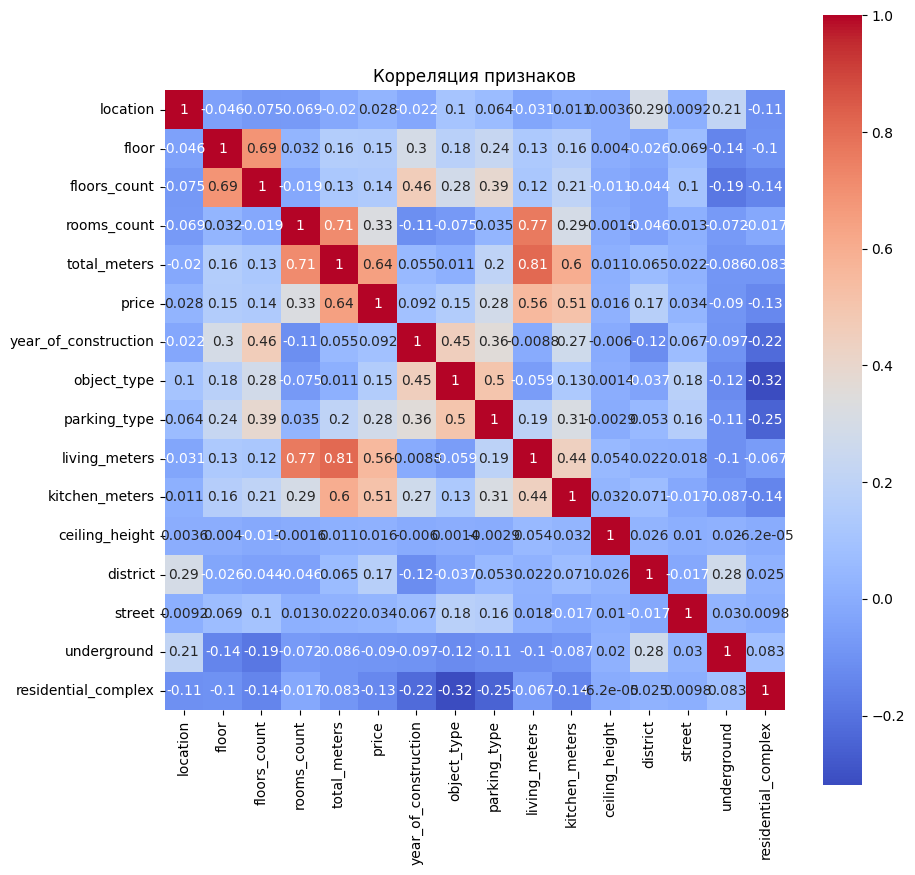

In [684]:
plt.subplots(figsize=(10, 10))
sns.heatmap(df_clean.corr(), square=True, annot=True, cmap='coolwarm')
plt.title("Корреляция признаков")
plt.show()